In [1]:
# pymongo 설치
# !pip install pymongo

In [2]:
# pymongo 설치 확인(설치되었다면 import가 되고 설치가 안 되었다면 오류문 출력)
import pymongo

In [3]:
# db 연결하는 객체 필요
## 1. db연결
## 2. collection 연결
## 3. documnet 조작

In [4]:
# 몽고 db 서버 연결
conn = pymongo.MongoClient()
conn

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [5]:
# shop이라는 데이터베이스에 연결
shop = conn.shop
shop

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'shop')

In [6]:
# test라는 db 생성
test = conn.test
test

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'test')

In [7]:
# 데이터베이스를 불러오는 방법과 생성하는 방법이 같다는 것을 알 수 있다

In [8]:
# test라는 데이터베이스 안에 board라는 collection 생성
# in-momory 방식: 모든 처리가 끝난 후 저장을 하는 방식
#                 데이터가 없으면 저장공간에 저장되지 않아 클라이언트 프로그램에서 보이지 않는다.
board = test.board
board

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'test'), 'board')

In [9]:
# shop 데이터베이스 안의 member collection 가져오기
member = shop.member
member

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'shop'), 'member')

In [10]:
# create documents
data1 = {"name":"song", "age":100}
data2 = {"name":"summer", "age":50, "addr":"jongro"}
data3 = [
         {"name":"jun", "age":100},
         {"name":"winter", "age":45, "addr":"kangnam"}
        ]

In [11]:
# 하나의 documents 넣기
member.insert_one(data1)

In [12]:
from IPython.display import Image

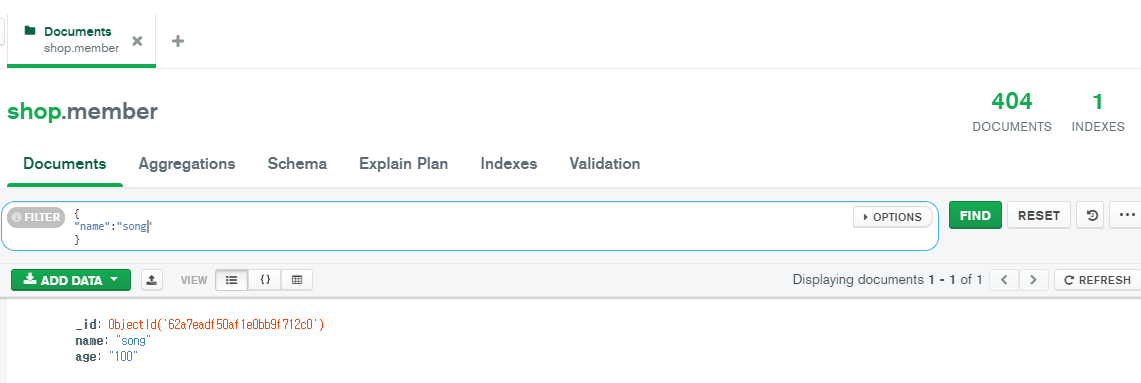

In [13]:
Image("image/data1_mongodb.png")

In [14]:
# 하나의 documents 넣기
member.insert_one(data2)

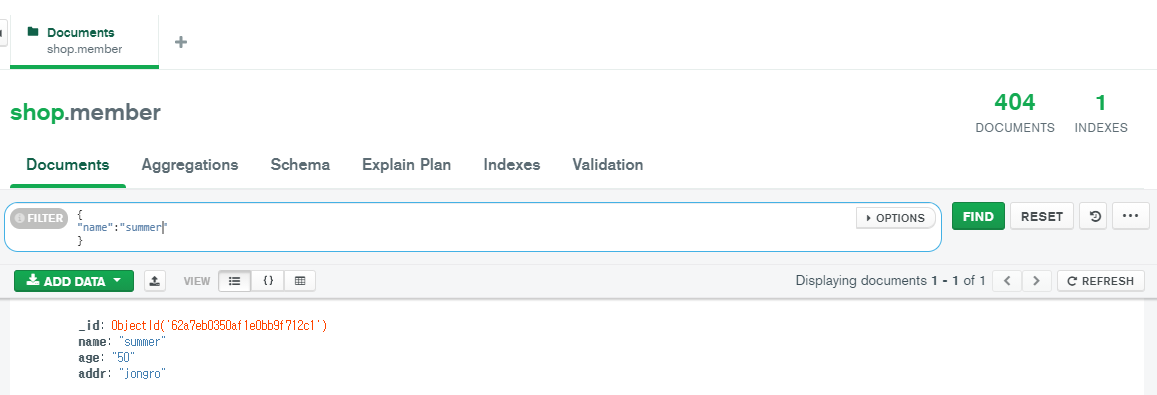

In [15]:
Image("image/data2_mongodb.png")

In [16]:
# 하나의 documents 넣기
member.insert_many(data3)

In [17]:
# read documents

In [18]:
# 전체 검색
docs = member.find({"age":50})
docs

In [19]:
for doc in docs:
    print(doc)

{'_id': ObjectId('62a7f91e810e74e92c20009e'), 'name': 'summer', 'age': 50, 'addr': 'jongro'}


In [20]:
# update documents

In [21]:
# member.update_one({조건},{바꿀 내용})
member.update_one(
    {"age": 50},
    {
        "$set": 
            {"name": "happy"}
    }
)

In [22]:
# member.update_one({조건},{바꿀 내용})
member.update_many(
    {"age": 100},
    {
        "$set": 
            {"name": "smile"}
    }
)

In [23]:
# 전체 검색
docs = member.find({"age":100})
for doc in docs:
    print(doc)

{'_id': ObjectId('62a7f91e810e74e92c20009d'), 'name': 'smile', 'age': 100}
{'_id': ObjectId('62a7f91e810e74e92c20009f'), 'name': 'smile', 'age': 100}


In [24]:
# delete documents
member.delete_one({"age":200})

In [25]:
member.delete_many({"age":100})

In [26]:
# 전체 documents 개수 조회
member.count_documents({})

2

In [27]:
# 조건을 주어서 검색할 수도 있다
member.count_documents({"age":100})

0

In [28]:
# 모든 instance(documents) 삭제!
member.delete_many({})

In [29]:
# 전체 documents 개수 조회
member.count_documents({})

0